### 1. Face Emotion Classification with a three layer neural network

In this problem we return to the face emotion data studied previously. You may it find very helpful to use code from a past activity.

(a) Build a classifier using a full connected three layer neural network with logistic activation functions. Your network should

- take a vector $x \in R^{10}$ as input (nine features plus a constant offset),
- have a single, fully connected hidden layer with 32 neurons
- output a scalar $\hat{y}$

Note that since the logistic activation function is always positive, your decision should be as follows: $\hat{y} > 0.5$ corresponds to a 'happy'face, while $\hat{y} \leq 0.5$  is not happy.

(b) Train your classifier using stochastic gradient descent (start with a step size of 
$α$ = 0.05) and create a plot with the number of epochs on the horizontal axis, and training accuracy on the vertical axis.  Does your classifier achieve 0% training error?  If so,  how many epoch does it take for your classifier to achieve perfect classification on the training set? 

In [1]:
def logsig(_x):
    return 1/(1+np.exp(-_x))

In [2]:
def run_epoch(L, M, q, p):
    ind_yhat_dict = dict()
    ## initial weights
    V = np.random.randn(M+1, q); 
    #print("V shape:", V.shape)
    W = np.random.randn(p+1, M);
    #print("W.shape:",W.shape)
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            #print("Xb shape:", Xb.shape)
            #print("Xb[[i],:] shape:",  Xb[[i],:].shape)
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            #print("H shape:", H.shape)
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
            ind_yhat_dict[i] = int(Yhat > 0.5)

    ind_yhat_dict = dict(sorted(ind_yhat_dict.items()))
    err_c1 =  np.sum(np.array(list(ind_yhat_dict.values())) == Y[:,0])
    error_rate = 1 - (err_c1 / np.shape(Y)[0])
    return error_rate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, Y = dataset['X'], dataset['y']
n, p = np.shape(X)

Y[Y==-1] = 0  # use 0/1 for labels instead of -1/+1\
X = np.hstack((np.ones((n,1)), X))  # append a column of ones

## Train NN
Xb = X #np.hstack((np.ones((n,1)), X))
#print("Xb shape:", Xb.shape)
q = np.shape(Y)[1] #number of classification problems
#print(q)
M = 32 #number of hidden nodes

alpha = 0.05 #step size
L = np.arange(0,50,10) #number of epochs = you cycle through all the training data one time, in random order
error_rates = []

for epoch in L:
    rate = run_epoch(epoch, M, q, p)
    error_rates.append(rate)

error_rates

<ipython-input-2-e0be4437905d>:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  err_c1 =  np.sum(np.array(list(ind_yhat_dict.values())) == Y[:,0])


[1.0, 0.1171875, 0.0, 0.0, 0.0]

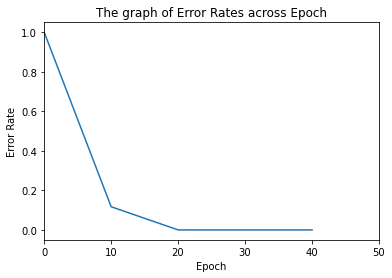

In [4]:
import matplotlib.pyplot as plt 

plt.plot(L, error_rates)
plt.title('The graph of Error Rates across Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.xlim(0,50)
plt.show()

(c) Find a more realistic estimate of the accuracy of your classifier by using 8-fold cross validation.  Can you achieve perfect test accuracy?

In [5]:
X_subsets = [X[:16,:], X[16:32,:], X[32:48,:], X[48:64,:], X[64:80,:], X[80:96,:], X[96:112,:], X[112:,:]]
y_subsets = [Y[:16,:], Y[16:32,:], Y[32:48,:], Y[48:64,:], Y[64:80,:], Y[80:96,:], Y[96:112,:], Y[112:,:]]

In [6]:
alpha = 0.05 #step size
L = 100 #number of epochs = you cycle through all the training data one time, in random order

error_rates = []

for fold in range(8):
    X = X_subsets.copy()
    y = y_subsets.copy()
    X_test = X.pop(fold)
    y_test = y.pop(fold) # use the remaining hold-out set to evaluate the classifier performance
    n, p = np.shape(X[0])
    p -= 1
    q = np.shape(Y)[1] #number of classification problems
    
    M = 32 #number of hidden nodes
    V = np.random.randn(M+1, q); # 33 x 1
    W = np.random.randn(p+1, M); # 11 x 32 ==> 10 x 32
    
    #print("V shape:",V.shape)
    #print("W shape:",W.shape)
    for j in range(7):
        for epoch in range(L):
            ind = np.random.permutation(n)
            #print("V shape:",V.shape)
            #Xb = np.hstack((np.ones((n,1)), X[j]))# 16 x 10
            Xb = X[j]
            #print("Xb shape:", Xb.shape) 
            #print(y)
            Y = y[j]
            #print(Y)
            #print(np.squeeze(Y))
            for i in ind:
                # Forward-propagate
                #print("Xb shape:", Xb.shape)
                #print("Xb[[i],:] shape:",  Xb[[i],:].shape)
                H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
                #print("H shape:", H.shape)
                #print("V shape:", V.shape)
                Yhat = logsig(H@V)
                 # Backpropagate
                #print("Yhat shape:", Yhat.shape)
                #print("Y_i shape:", Y[[i],:].shape)
                delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
                Vnew = V-alpha*H.T@delta
                gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
                Wnew = W - alpha*Xb[[i],:].T@gamma
                V = Vnew
                W = Wnew
                #ind_yhat_dict[i] = int(Yhat > 0.5)
        
                
    y_hat_result = []
    ind_yhat_dict = dict()
    for k in range(X_test.shape[0]):
        H = logsig(np.hstack((np.ones((1,1)), X_test[[i],:]@W)))
        Yhat = logsig(H@V)
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Vnew = V-alpha*H.T@delta
        gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
        Wnew = W - alpha*Xb[[i],:].T@gamma
        V = Vnew
        W = Wnew
        ind_yhat_dict[i] = int(Yhat > 0.5)
        
    ind_yhat_dict = dict(sorted(ind_yhat_dict.items()))
    err_c1 =  np.sum(np.array(list(ind_yhat_dict.values())) == y_test)
    error_rate = 1 - (err_c1 / np.shape(y_test)[0])
    print(f"Error Rate for fold {fold}:", error_rate)
    error_rates.append(error_rate)
    print()
    
print("Total average test set error rate:", sum(error_rates) / len(error_rates))

Error Rate for fold 0: 0.375

Error Rate for fold 1: 0.4375

Error Rate for fold 2: 0.5625

Error Rate for fold 3: 0.5625

Error Rate for fold 4: 0.4375

Error Rate for fold 5: 0.5

Error Rate for fold 6: 0.5

Error Rate for fold 7: 0.3125

Total average test set error rate: 0.4609375


### 2. Face Emotion Classification with Kernel Classifier

In this problem you will apply a kernel classifier to the face emotion dataset. You may find it very helpful to use code from an activity.

(a) Build a kernel classifier using

- the squared error loss function
- an $l_2$ regularizer with $\lambda = 0.5$.
- the Gaussian Kernel $K(u,v) = exp(-||u-v||^2 / (2\sigma^2)$.\

(b) Train your classifier choosing for different values of $\sigma$ and create a plot with $\sigma$ on the hortizontal axis and accuracy on the vertical axis and comment on the plot. Does your classifier achieve 0% training error?

In [ ]:
sigma = 5
lam = 0.05

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@Y1

(c) Find a more realistic estimate of the accuracy of your classifier by using 8-fold cross validation. Can you achieve perfect test accuracy?